In [3]:
# Title: Choosing the Right Neural Network Architecture


# Task 1: Shallow vs Deep Networks

# Create a shallow network with one hidden layer.
# Train using the same dataset with a deep network having three hidden layers.
# Compare their training and test accuracy to understand scenarios where deep networks perform better.

# Task 2: Overfitting vs Underfitting

# Train a model with too few neurons and epochs (underfit).
# Increase the model complexity by adding layers and neurons (overfit).
# Use validation data to identify the setup that balances training and validation accuracy.


# Task 3: Using Dropout Regularization

# Implement a network without dropout.
# Add a dropout layer with a rate of 0.5 to the hidden layers.
# Observe how dropout helps in preventing overfitting and improves generalization on unseen data.




Task 1: Shallow vs Deep Networks
Epoch 1/10
938/938 - 3s - 3ms/step - accuracy: 0.9150 - loss: 0.3034 - val_accuracy: 0.9517 - val_loss: 0.1644
Epoch 2/10
938/938 - 2s - 2ms/step - accuracy: 0.9611 - loss: 0.1363 - val_accuracy: 0.9638 - val_loss: 0.1183
Epoch 3/10
938/938 - 2s - 2ms/step - accuracy: 0.9724 - loss: 0.0946 - val_accuracy: 0.9667 - val_loss: 0.1008
Epoch 4/10
938/938 - 2s - 2ms/step - accuracy: 0.9787 - loss: 0.0718 - val_accuracy: 0.9720 - val_loss: 0.0837
Epoch 5/10
938/938 - 2s - 2ms/step - accuracy: 0.9830 - loss: 0.0568 - val_accuracy: 0.9763 - val_loss: 0.0743
Epoch 6/10
938/938 - 2s - 2ms/step - accuracy: 0.9866 - loss: 0.0446 - val_accuracy: 0.9765 - val_loss: 0.0725
Epoch 7/10
938/938 - 2s - 2ms/step - accuracy: 0.9894 - loss: 0.0352 - val_accuracy: 0.9774 - val_loss: 0.0698
Epoch 8/10
938/938 - 2s - 2ms/step - accuracy: 0.9906 - loss: 0.0302 - val_accuracy: 0.9760 - val_loss: 0.0760
Epoch 9/10
938/938 - 2s - 2ms/step - accuracy: 0.9932 - loss: 0.0235 - val_accu

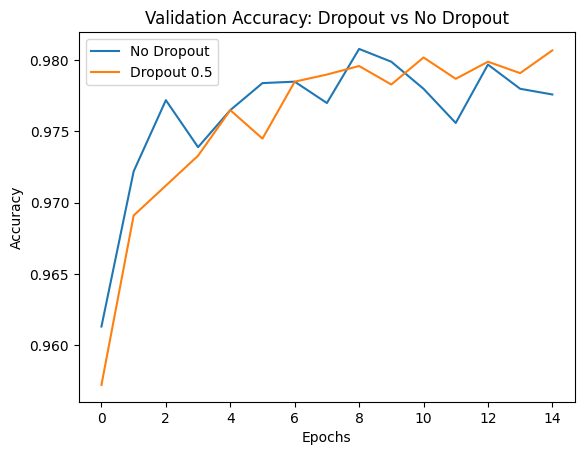

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

def build_model(layers_config, use_dropout=False, dropout_rate=0.5):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    
    for units in layers_config:
        model.add(Dense(units, activation='relu'))
        if use_dropout:
            model.add(Dropout(dropout_rate))
    
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Task 1: Shallow vs Deep Networks
print("Task 1: Shallow vs Deep Networks")

shallow_model = build_model([128], use_dropout=False)
deep_model = build_model([128, 128, 128], use_dropout=False)

history_shallow = shallow_model.fit(X_train, y_train, epochs=10, batch_size=64,
                                    validation_data=(X_test, y_test), verbose=2)
history_deep = deep_model.fit(X_train, y_train, epochs=10, batch_size=64,
                              validation_data=(X_test, y_test), verbose=2)

# Task 2: Overfitting vs Underfitting
print("\nTask 2: Overfitting vs Underfitting")

# Underfitting: too small network, few epochs
underfit_model = build_model([16], use_dropout=False)
history_underfit = underfit_model.fit(X_train, y_train, epochs=5, batch_size=64,
                                     validation_data=(X_test, y_test), verbose=2)

# Overfitting: large network, many epochs, no dropout
overfit_model = build_model([512, 512], use_dropout=False)
history_overfit = overfit_model.fit(X_train, y_train, epochs=20, batch_size=64,
                                   validation_data=(X_test, y_test), verbose=2)

# Task 3: Using Dropout Regularization
print("\nTask 3: Dropout Regularization")

# Without dropout
no_dropout_model = build_model([256, 256], use_dropout=False)
history_no_dropout = no_dropout_model.fit(X_train, y_train, epochs=15, batch_size=64,
                                          validation_data=(X_test, y_test), verbose=2)

# With dropout
dropout_model = build_model([256, 256], use_dropout=True, dropout_rate=0.5)
history_dropout = dropout_model.fit(X_train, y_train, epochs=15, batch_size=64,
                                   validation_data=(X_test, y_test), verbose=2)

# Optional: Plot validation accuracy comparison for dropout vs no dropout
plt.plot(history_no_dropout.history['val_accuracy'], label='No Dropout')
plt.plot(history_dropout.history['val_accuracy'], label='Dropout 0.5')
plt.title('Validation Accuracy: Dropout vs No Dropout')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
